# MERSCOPE

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [3]:
import BINARY

In [4]:
import pysodb
sodb = pysodb.SODB()

In [5]:
adata_dict = sodb.load_dataset('Dataset13_MS_raw')
adata_raw = list(adata_dict.values())[0]

load experiment[Dataset13] in dataset[Dataset13_MS_raw]


In [6]:
adata_raw

AnnData object with n_obs × n_vars = 734696 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'slice_id', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'ct'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ct_colors', 'hvg', 'leiden', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [7]:
adata = BINARY.clean_adata(adata_raw, save_obs=['slice_id'])
adata

AnnData object with n_obs × n_vars = 734696 × 483
    obs: 'slice_id'
    obsm: 'spatial'

In [8]:
import numpy as np
np.unique(adata.obs['slice_id'])

array(['R1S1', 'R1S2', 'R1S3', 'R2S1', 'R2S2', 'R2S3', 'R3S1', 'R3S2',
       'R3S3'], dtype=object)

In [10]:
experiment_name = 'R3S2'

In [11]:
adata = adata[adata.obs['slice_id']== experiment_name ]
adata

View of AnnData object with n_obs × n_vars = 85958 × 483
    obs: 'slice_id'
    obsm: 'spatial'

In [12]:
adata.var_names_make_unique()

In [13]:
adata = BINARY.Count2Binary(adata)

In [14]:
BINARY.Construct_Spatial_Graph(adata, use_method='KNN', cutoff=15)

------Constructing spatial graph...------
The graph contains 1289370 edges, 85958 cells.
15.0000 neighbors per cell on average.


In [15]:
adata = BINARY.train_BINARY(adata, pos_weight = 10, device= 'cuda:0')

Size of Input:  (85958, 483)


100%|██████████| 1000/1000 [01:43<00:00,  9.62it/s]


In [16]:
sc.pp.neighbors(adata, use_rep='BINARY')
sc.tl.umap(adata)

In [21]:
sc.tl.leiden(adata, resolution= 1)

(51.18393756430595, 10113.721657756902, -141.07202616399155, 7537.619496310782)

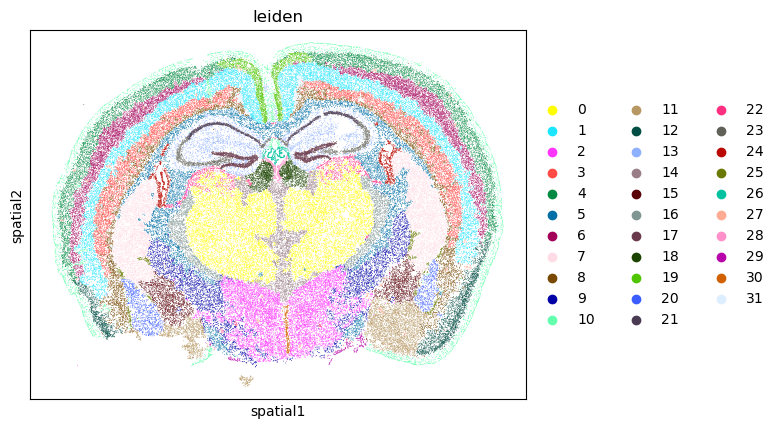

In [22]:
ax = sc.pl.embedding(adata, basis='spatial', color= 'leiden', show= False)
ax.axis('equal')